This notebook is just there to create charts and graphs for the final presentation

In [1]:
from sksurv.datasets import load_veterans_lung_cancer
import pandas as pd

data_x, data_y = load_veterans_lung_cancer()
data_x['Prior_therapy'] = data_x['Prior_therapy'].map({'no': 0, 'yes': 1})
df = pd.concat([data_x[['Age_in_years', 'Months_from_Diagnosis', 'Prior_therapy']], pd.DataFrame(data_y)], axis=1)
df.head()

,Age_in_years,Months_from_Diagnosis,Prior_therapy,Status,Survival_in_days
0,69.0,7.0,0,True,72.0
1,64.0,5.0,1,True,411.0
2,38.0,3.0,0,True,228.0
3,63.0,9.0,1,True,126.0
4,65.0,11.0,1,True,118.0


<lifelines.CoxPHFitter: fitted with 137 total observations, 9 right-censored observations>
             duration col = 'Survival_in_days'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 137
number of events observed = 128
   partial log-likelihood = -503.94
         time fit was run = 2026-01-27 23:55:50 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
Age_in_years           0.01      1.01      0.01           -0.01            0.03                0.99                1.03
Months_from_Diagnosis  0.01      1.01      0.01           -0.00            0.03                1.00                1.03
Prior_therapy         -0.26      0.77      0.22           -0.69            0.17                0.50                1.19

                       cmp to     z    p  -log2(p)
covariate                                         
Age_in_years             0.00  0.79 0.43      1.22
Months_from_Diagnosis    0.00  1.51 0.13      2.94
Prior_therapy            0.00 -1.17 0.24      2.04
---
Concordance = 0.52
Partial AIC = 1013.89
log-likelihood ratio test = 3.01 on 3 df
-log2(p) of ll-ratio test = 1.36

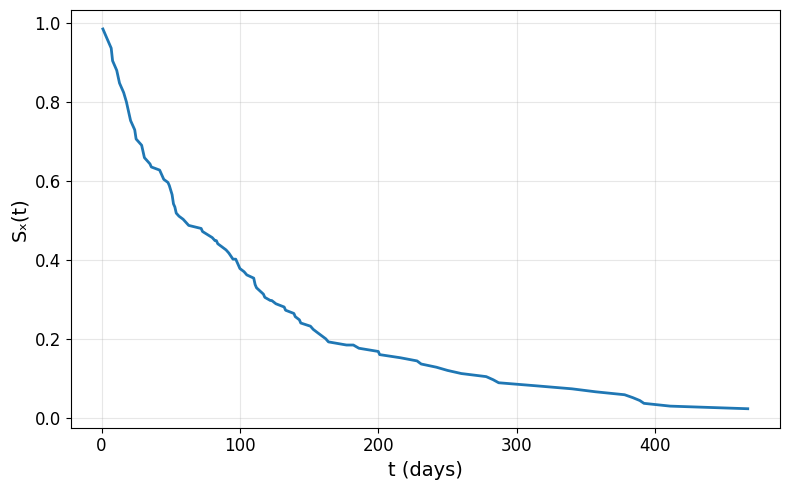

In [2]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df, 'Survival_in_days', 'Status')
cph.print_summary()

import matplotlib.pyplot as plt

patient = df.iloc[0]
sf = cph.predict_survival_function(patient).loc[:500]

plt.figure(figsize=(8, 5))                      # nicer size
plt.plot(sf, linewidth=2)                       # thicker curve

plt.ylabel('Sₓ(t)', fontsize=14)
plt.xlabel('t (days)', fontsize=14)

plt.tick_params(axis='both', labelsize=12)      # bigger tick labels
plt.grid(True, alpha=0.3)                       # subtle grid

plt.tight_layout()
plt.show()
